166.66673333333318
166.6667333330556
166.6667333330556
125.00004999999987
125.00004999984375
125.00004999984375
Cumulative Profit per Agent:
  Agent 0: 18355405.7727
  Agent 1: 18381760.3620

Average Profit per Period per Agent:
  Agent 0: 183.5541
  Agent 1: 183.8176

Theoretical Profit Bounds:
  Non-collusive Equilibrium Profit (pi_N): 55.5556
  Perfect Cartel Equilibrium Profit (pi_M): 62.5000


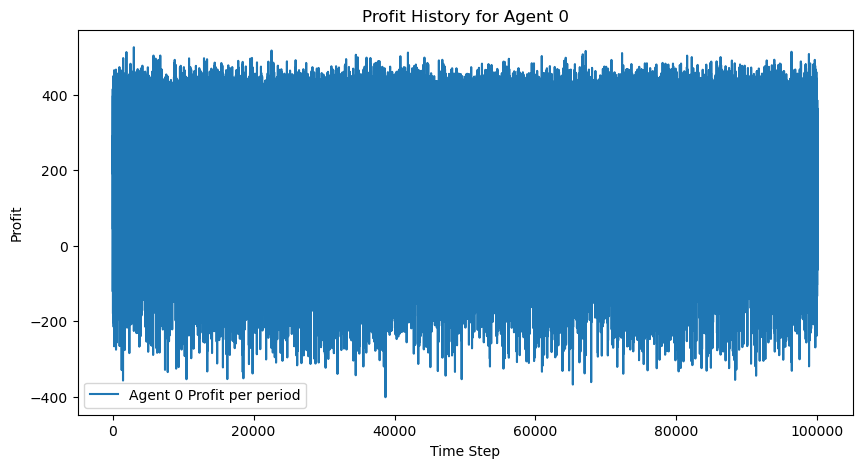


Ratios (Average Profit / Theoretical Profit):
  Ratio to Non-collusive Profit: 3.31
  Ratio to Perfect Cartel Profit: 2.94


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from agents import solve_chiN, solve_chiM  # Adjust the import if needed
from config import Config  # Assumes your config file is imported from here

def test_agent_profit(sim_log, config):
    # Extract profit history from simulation log (shape: [num_agents, T])
    profit_hist = sim_log['profit']
    
    # Compute cumulative and average profit per agent
    cumulative_profit = np.sum(profit_hist, axis=1)
    avg_profit_per_period = np.mean(profit_hist, axis=1)
    
    # Compute theoretical profit bounds based on your model
    # Non-collusive equilibrium profit: pi_N = (1 - lambda_N * I * chi_N)*chi_N*sigma_v^2
    # Perfect cartel equilibrium profit: pi_M = (1 - lambda_M * I * chi_M)*chi_M*sigma_v^2
    chi_N, lambda_N = solve_chiN(config.I, config.xi, config.sigma_u, config.sigma_v, config.theta)
    chi_M, lambda_M = solve_chiM(config.I, config.xi, config.sigma_u, config.sigma_v, config.theta)
    
    pi_N = (1 - lambda_N * config.I * chi_N) * chi_N * (config.sigma_v**2)
    pi_M = (1 - lambda_M * config.I * chi_M) * chi_M * (config.sigma_v**2)
    
    # Print the results
    print("Cumulative Profit per Agent:")
    for i, profit in enumerate(cumulative_profit):
        print(f"  Agent {i}: {profit:.4f}")
        
    print("\nAverage Profit per Period per Agent:")
    for i, avg_profit in enumerate(avg_profit_per_period):
        print(f"  Agent {i}: {avg_profit:.4f}")
        
    print("\nTheoretical Profit Bounds:")
    print(f"  Non-collusive Equilibrium Profit (pi_N): {pi_N:.4f}")
    print(f"  Perfect Cartel Equilibrium Profit (pi_M): {pi_M:.4f}")
    
    # Optionally, plot the profit history for one agent to visually inspect behavior
    plt.figure(figsize=(10, 5))
    plt.plot(profit_hist[0], label="Agent 0 Profit per period")
    plt.xlabel("Time Step")
    plt.ylabel("Profit")
    plt.title("Profit History for Agent 0")
    plt.legend()
    plt.show()
    
    # Compute ratio of achieved profit (e.g., average profit) to theoretical bounds
    ratio_N = np.mean(avg_profit_per_period) / pi_N if pi_N != 0 else np.nan
    ratio_M = np.mean(avg_profit_per_period) / pi_M if pi_M != 0 else np.nan
    print("\nRatios (Average Profit / Theoretical Profit):")
    print(f"  Ratio to Non-collusive Profit: {ratio_N:.2f}")
    print(f"  Ratio to Perfect Cartel Profit: {ratio_M:.2f}")

# Example usage:
if __name__ == '__main__':
    # Load your simulation log (adjust path as needed)
    sim_log = np.load('/Users/moyuanchen/Documents/thesis/sim_4/data_part_78.npy', allow_pickle=True).item()
    
    # Create a configuration instance (if your config is defined as a class)
    config = np.load('/Users/moyuanchen/Documents/thesis/sim_4/config.npy', allow_pickle=True).item()
    config.sigma_u = 200000
    
    # Run the test
    test_agent_profit(sim_log, config)


In [4]:
solve_chiN(config.I, config.xi, 1000, config.sigma_v, config.theta)

166.66673332666664
166.66672333332673
166.6667233333272


(166.6667233333272, 0.0019999993200003046)

In [5]:
2*166.66 / ((2*166.66)**2 + (1000)**2)

0.00029999039987520053

In [6]:
config.theta*0.0003+config.xi

500.00003

In [8]:
config.xi/config.xi**2

0.002

In [9]:
1/(3*0.002)

166.66666666666666